In [1]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks, peak_prominences
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

07번 참가자 Food log 날짜가 범위에서 벗어남.  
  
덱스콤 실제 데이터 범위.  
2020-03-14 12:42:19  
2020-03-22 11:06:57  
  
Food Log  
10/16/2019 13:44  
10/24/2019 8:30  

In [2]:
fl_df = pd.read_csv('../big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.2/002/Food_Log_002.csv')

fl_df['date']=pd.to_datetime(fl_df['date'])
fl_df['time_begin']=pd.to_datetime(fl_df['time_begin'])

In [3]:
dexcom_df = pd.read_csv('../big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.2/002/Dexcom_002.csv')
dexcom_df.drop(dexcom_df.loc[:11].index, inplace=True)
dexcom_df.rename(columns = {'Timestamp (YYYY-MM-DDThh:mm:ss)': 'datetime'}, inplace = True)
dexcom_df['datetime']=pd.to_datetime(dexcom_df['datetime'])

In [4]:
dexcom_df.iloc[0]['datetime']

Timestamp('2020-02-21 11:08:36')

## 2020-02-22

Index                                        168
Event Type                                   EGV
Event Subtype                                NaN
Patient Info                                 NaN
Device Info                                  NaN
Source Device ID                      Android G6
Glucose Value (mg/dL)                      158.0
Insulin Value (u)                            NaN
Carb Value (grams)                           NaN
Duration (hh:mm:ss)                          NaN
Glucose Rate of Change (mg/dL/min)           NaN
Transmitter Time (Long Integer)          56400.0
Name: 2020-02-22 00:03:35, dtype: object
2020-02-22 05:39:00
2020-02-22 05:39:00
2020-02-22 06:30:00
2020-02-22 13:46:00
2020-02-22 16:08:00
2020-02-22 17:50:00
2020-02-22 17:50:00
2020-02-22 18:22:00
2020-02-22 20:45:00


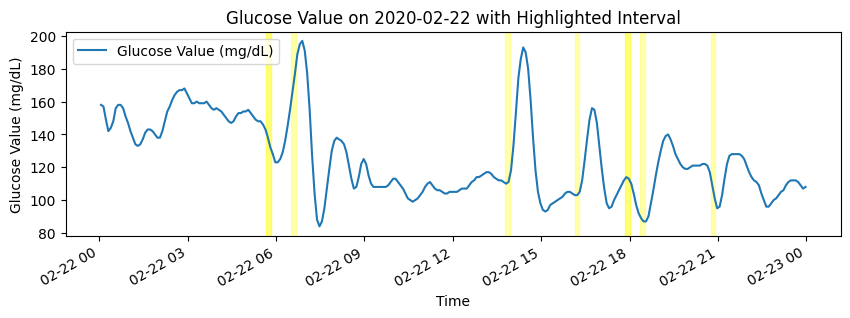

In [5]:
# 날짜 필터링
filtered_df = dexcom_df[(dexcom_df['datetime'] >= '2020-02-22 00:00:00') & (dexcom_df['datetime'] <= '2020-02-22 23:59:59')]
filtered_fl = fl_df[(fl_df['time_begin'] >= '2020-02-22 00:00:00') & (fl_df['time_begin'] <= '2020-02-22 23:59:59')]
# 인덱스를 datetime으로 설정
filtered_df.set_index('datetime', inplace=True)

# 그래프 그리기
ax = filtered_df.plot(y='Glucose Value (mg/dL)', figsize=(10, 3), legend=True)
print(filtered_df.iloc[0])

# 특정 구간 강조 (오후 2시부터 오후 6시)
for idx in range(len(filtered_fl)):
    start_time = pd.Timestamp(filtered_fl.iloc[idx]['time_begin'])
    print(start_time)
    end_time = start_time + pd.Timedelta(minutes=10)
    plt.axvspan(start_time, end_time, color='yellow', alpha=0.3)


# 그래프 제목 및 축 라벨 설정
plt.title('Glucose Value on 2020-02-22 with Highlighted Interval')
plt.xlabel('Time')
plt.ylabel('Glucose Value (mg/dL)')

# 그래프 출력
plt.show()